In [128]:
import pandas as pd
import glob
pd.set_option("display.max_rows", 30)
pd.set_option("display.max_columns", 1000)
pd.set_option("display.max_colwidth", 1000)
pd.set_option("display.width", 2000)

In [145]:
import numpy as np
np.set_printoptions(precision=4,suppress=True)
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
import spacy

In [296]:
from tqdm import tqdm

In [147]:
nlp = spacy.load('de')

In [251]:
frames = []
for f in glob.glob('../data/*.csv')[-1:]:
    frames.append(pd.read_csv(f))

In [252]:
raw_df = pd.concat(frames)

In [253]:
raw_df

,SichterGruppe,SichterName,Host,kind,Datetime,Content,Url,Authorid,Tag,entryid,Id,TwistId,TopicId,TopicName,IsInitialEntry,IsPrivate
0,NaN,NaN,twitter.com,2,21.01.2016 22:47:11,für wen tippen Sie ?,http://twitter.com/the_arachon/statuses/690289565060431873,2930733.0,A-Team Twitter:GF Twitter,ede94e94-8c2c-4a5d-a6ca-9e66052e7905,22676931,f7465813-acf5-411a-aa6e-0009501eccab,0,NaN,True,False
1,NaN,NaN,twitter.com,2,25.01.2016 18:19:02,#telekom #smarthome bestellt \ o /,http://twitter.com/Mar_tin8988/statuses/691671631622729728,2730339.0,A-Team Twitter:Reaktion ja,4b71081e-fd90-4ea2-b2cb-f015d4bd6961,22776438,f7465813-acf5-411a-aa6e-0009501eccab,0,NaN,False,False
2,NaN,NaN,twitter.com,3,25.01.2016 19:39:06,yeah ! Ganz viel Spass damit . :) ^ em,https://twitter.com/Telekom_hilft/status/691691783697342465?pid=691691783697342465&uid=691691783697342465&aid=123675232,2342421.0,NaN,3192065c-950f-4c07-b09c-0a94fc97bafe,22778949,f7465813-acf5-411a-aa6e-0009501eccab,0,NaN,False,False
3,NaN,NaN,twitter.com,4,11.02.2016 18:03:49,"O2 scheiß Netz , Telekom ( meist ) top Netz …",http://twitter.com/macwinnie/statuses/697828396613660673,153317.0,A-Team Twitter:Reaktion nein,f1c02ba4-7a55-4b54-9812-06f9f815db3f,23367417,f7465813-acf5-411a-aa6e-0009501eccab,0,NaN,False,False
4,NaN,NaN,twitter.com,3,04.01.2016 10:38:02,Was ist euer Soundtrack für 2016 ? Sucht es euch aus mit unserem Partner 30 Mio . Songs für Alle ! https://t.co/HyyFMsPprq,https://twitter.com/telekomerleben/status/683945473506422784#aid=20459730,1060906.0,NaN,25ae5dbc-04ba-4065-b74f-b0696b13349c,22118263,2901dc08-6c40-4c13-8613-000a40c07510,551631,Alle,True,False
5,NaN,NaN,twitter.com,1,20.01.2016 16:27:15,@Telekom_hilft Ich kann vom Festnetz aktuell nicht telefonieren oder angerufen werden . Habt ihr aktuell eine Störung ? ( PLZ : 01234567890 ),https://twitter.com/Ortwin98/status/689831561177493504#aid=815577702,5971050.0,NaN,e1ba60ea-55c6-4933-810e-c2fc5a8ee195,22626277,178d1ca4-fa81-4c12-86ed-000d89a56d77,551631,Alle,True,False
6,NaN,NaN,twitter.com,3,20.01.2016 19:46:03,"nein , eine bekannte Störung habe ich nicht gefunden . Seit wann funktioniert die Telefonie nicht ? Internet ist ok ? ^ cl",https://twitter.com/Telekom_hilft/status/689881591431196676#aid=123675232,254012.0,NaN,2aa1dc71-9580-424e-8566-fafa90fe8d61,22636529,178d1ca4-fa81-4c12-86ed-000d89a56d77,551631,Alle,False,False
7,NaN,NaN,twitter.com,4,20.01.2016 20:12:46,"@Telekom_hilft ca 16 Uhr , Internet geht Problemlos .",https://twitter.com/Ortwin98/status/689888316322349056#aid=815577702,5971050.0,NaN,6a7df070-87f3-4654-96ed-173a87ae73d6,22637673,178d1ca4-fa81-4c12-86ed-000d89a56d77,551631,Alle,False,False
8,NaN,NaN,twitter.com,3,20.01.2016 20:52:13,wie sind die Telefone angeschlossen ? Die Telefone schon einmal neu im Speedport konfiguriert ? ^ cl,https://twitter.com/Telekom_hilft/status/689898244378357760#aid=123675232,254012.0,NaN,1159cf1e-ce0c-47da-af03-d93d8be47b19,22639068,178d1ca4-fa81-4c12-86ed-000d89a56d77,551631,Alle,False,False
9,NaN,NaN,twitter.com,4,20.01.2016 21:07:19,"@Telekom_hilft Jetzt geht's auf einmal wieder , keine Ahnung woran es lag . Aber danke für die Hilfe .",https://twitter.com/Ortwin98/status/689902044996575234#aid=815577702,5971050.0,NaN,2e0f17a1-94be-4f1d-9405-7dadbf94166c,22639660,178d1ca4-fa81-4c12-86ed-000d89a56d77,551631,Alle,False,False


In [254]:
pd.unique(raw_df.SichterName)

array([nan, 'GK', 'Wechsler', 'Entertain', 'Hybrid & LTE', 'Neue Themen'],
      dtype=object)

In [255]:
df = pd.concat([raw_df[raw_df.Tag.isnull()], raw_df[raw_df.Tag=='Prio-Fall']])

In [256]:
df = df[df.kind == 1]

In [257]:
df

,SichterGruppe,SichterName,Host,kind,Datetime,Content,Url,Authorid,Tag,entryid,Id,TwistId,TopicId,TopicName,IsInitialEntry,IsPrivate
5,NaN,NaN,twitter.com,1,20.01.2016 16:27:15,@Telekom_hilft Ich kann vom Festnetz aktuell nicht telefonieren oder angerufen werden . Habt ihr aktuell eine Störung ? ( PLZ : 01234567890 ),https://twitter.com/Ortwin98/status/689831561177493504#aid=815577702,5971050.0,NaN,e1ba60ea-55c6-4933-810e-c2fc5a8ee195,22626277,178d1ca4-fa81-4c12-86ed-000d89a56d77,551631,Alle,True,False
19,NaN,NaN,www.facebook.com,1,15.02.2016 18:41:56,Ich warte noch auf eine korrekte Rechnung !,https://www.facebook.com/122768271103611/posts/1002021919844904#pid=122768271103611&uid=122768271103611_1002021919844904&aid=818143854921581&vid=2&wid=122768271103611,77608.0,NaN,da993d3a-068f-44e3-a753-858e6529d1ae,23488176,b8c1c575-beba-426d-80a8-0014faeb18a6,551631,Alle,True,False
25,NaN,NaN,www.facebook.com,1,17.01.2016 13:05:13,Habe nur 200 mb hätte gern 500 dabei ! ! ! Was machen ?,https://www.facebook.com/122768271103611/posts/988171414563288#pid=122768271103611&uid=122768271103611_988171414563288&aid=540568126101810&vid=2&wid=122768271103611,7130892.0,NaN,73778aa7-c303-4e3f-80a2-6660dfbd6921,22532283,db0002da-f7fe-41ac-915e-001525e9a3fe,551631,Alle,True,False
38,NaN,NaN,twitter.com,1,19.01.2016 17:10:19,"@Telekom_hilft Kann ich echt meine Handynummer nicht übernehmen , nur weil mein alter Vertrag davor über meinen Vater lief ?",https://twitter.com/Annii_Mariia/status/689480011833851904#aid=956139962,7143307.0,NaN,e2413267-7648-4ea2-b000-4fa25811dd55,22592637,f2f1795d-68b2-47da-89d9-00203bb65d03,551631,Alle,True,False
53,NaN,NaN,twitter.com,1,10.01.2016 15:34:34,@Telekom_hilft Eine Woche offline sein ist langsam lästig . Wann bekommt ihr die Leitung mal wieder lauffähig ? Vorwahlgebiet 01234567890 !,https://twitter.com/sgerstl/status/686194424636936192#aid=81342835,1110684.0,NaN,43bd31ba-e62c-4b12-b7a8-0dc53e6035a8,22314955,353d37c8-5382-4cd4-9719-002427fbc527,551631,Alle,True,False
101,NaN,NaN,twitter.com,1,05.01.2016 12:34:33,"@Telekom_hilft komme im Kundencenter nicht an meine Rechnung und muss diese expensen , Ideen ?",https://twitter.com/_mv/status/684337185231867904#aid=17988651,1785434.0,NaN,69def8da-15b0-4057-9d24-6cae1f757afd,22150534,a046020d-d590-484d-890f-004995cc246d,551631,Alle,True,False
169,Sichter FB/TW,GK,www.facebook.com,1,13.02.2016 20:06:35,"Betrifft Firmenanschluss meines Bruders in Hude , Am Amazonenwerk : seit 4 Tagen wegen Umstellung auf ip der Firma kein Internet , Telefon - Faxbetrieb und AB-Nutzung möglich . Techniker war vor Ort . Zugangsdaten nicht abrufbar weil das Terminal der Telekom angeblich zusammen gebrochen war . Alternativ : Rufumstellung auf Handy . Neuer Termin mit Techniker im Moment nicht möglich . Heute , am Samstag bekommt mein Bruder eine Nachfrage von der Telekom ob er mit der Umstellung auf ip zufrieden sei . Nachdem er sein Elend erklärte , gabs zur Antwort : Wir haben für diese Umstellung zur Zeit 300 Kunden , machen Sie mal halblang , schliesslich ist Wochenende . Super Job Telekom ! ! !",https://www.facebook.com/122768271103611/posts/1000937823286647#pid=122768271103611&uid=122768271103611_1000937823286647&aid=482170058606349&vid=2&wid=122768271103611,5701279.0,NaN,58253b4b-1032-4b63-9175-e011b35c535f,23431005,c94544a9-f685-4006-950a-0078140d7c3a,551631,Alle,True,False
184,NaN,NaN,www.facebook.com,1,11.02.2016 20:44:02,Hallo Telekom-Team ! Mein Magenta-Hybrid sollte heute bereits um 11:15 Uhr geschaltet werden . Die Zugangsdaten werden immer noch als ungültig zurückgemeldet . Wann komm ich mal wieder ins Internet ? Viele Grüße Cornelius S .,https://www.facebook.com/122768271103611/posts/1000040376709725#pid=122768271103611&uid=122768271103611_1000040376709725&aid=992854620727708&vid=2&wid=122768271103611,3170058.0,NaN,874daff2-aeee-452d-877a-46ad99cf11fd,23372523,f615e41d-ef71-4058-8871-007ca0b036a6,551631,Alle,True,False
188,NaN,NaN,www.facebook.com,1,26.02.2016 10:51:52,Is the

In [297]:
import re
GRUBER_URLINTEXT_PAT = re.compile(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?\xab\xbb\u201c\u201d\u2018\u2019]))')
NUMBER_CLEAN = re.compile(r'\d+(:?[.,]?\d+)*')
TIME_CLEAN = re.compile(r'\d+:\d+(?:\s?[Uu]hr)?')

def preprocessing(text):
    try:
        # clean-up url
        text = GRUBER_URLINTEXT_PAT.sub('url', text)
        # remove time
        text = TIME_CLEAN.sub('zeit', text)
        # clean-up numbers
        text = NUMBER_CLEAN.sub('nummer', text)
        return text
    except:
        return ''

preprocessing('Yeah , der WG gefällt deine Musik . Hol dir auch superschnelles Internet ! https://t.co/0dPArCUv0b https://t.co/HHRZaAQnte http://pbs.twimg.com/amplify_video_thumb/0123456789001234567890/img/QEQntlwB_ifYH3Gv.jpg')

'Yeah , der WG gefällt deine Musik . Hol dir auch superschnelles Internet ! url url url'

In [299]:
documents = [] # Content
docs = [] # Content through spacy
labels = [] # SichterName
tags = [] # Tag

for (idx, row) in tqdm(df.iterrows()):
    labels.append(row.SichterName)
    documents.append(preprocessing(row.Content))
#     docs.append(nlp(documents[-1]))
    tags.append(str(row.Tag))

print(len(documents))


0it [00:00, ?it/s]
566it [00:00, 5657.17it/s]
1053it [00:00, 5393.22it/s]
1498it [00:00, 5070.56it/s]
2026it [00:00, 5129.70it/s]
2596it [00:00, 5288.10it/s]
3113it [00:00, 5251.16it/s]
3678it [00:00, 5363.26it/s]
4244it [00:00, 5446.36it/s]
4765it [00:00, 5372.05it/s]
5282it [00:01, 5125.23it/s]
5789it [00:01, 5107.87it/s]
6333it [00:01, 5202.95it/s]
6848it [00:01, 5100.92it/s]
7365it [00:01, 5120.64it/s]
7875it [00:01, 5057.77it/s]
8380it [00:01, 4841.55it/s]
8866it [00:01, 4773.10it/s]
9345it [00:01, 4394.17it/s]
9791it [00:02, 3740.39it/s]
10187it [00:02, 3564.16it/s]
10314it [00:02, 4671.23it/s]

10314


4625it [01:50, 42.03it/s]

In [ ]:
labels[0], documents[0], docs[0], tags[0]

# Feature Analysis

In [ ]:
from collections import Counter
# create lemma lists filter punctuation and numbers
# from spacy
lemmas = [word.lemma_ for words in docs for word in words if word.pos_ not in ['PUNCT','NUM']]
counts = Counter(lemmas)

In [ ]:
lemma_df = pd.DataFrame.from_dict(counts, orient='index')
lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))

In [ ]:
lemmas = [len(words) for words in documents]
word_counts = Counter(lemmas)

lemma_df = pd.DataFrame.from_dict(word_counts, orient='index')
a = lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))
a.set_title('number of words per row')
a.set_ylabel('number of rows')
a.set_xlabel('number of words')

In [ ]:
lemmas = ([len(document) for document in documents])
word_counts = Counter(lemmas)

lemma_df = pd.DataFrame.from_dict(word_counts, orient='index')
a = lemma_df.sort_values(by=0,ascending=False).head(50).plot(kind='bar', figsize=(20,10))
a.set_title('number of characters per row')
a.set_ylabel('number of rows')
a.set_xlabel('number of words')

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join([word.lemma_ for doc in docs for word in doc]))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title('Most common lemmas')
plt.axis('off')

In [ ]:
with open('./stopwords-de.txt') as f:
    stopwords = f.read().split('\n')

In [ ]:
from wordcloud import WordCloud
cloud = WordCloud(width=1440, height=1080).generate(" ".join([word.lemma_ for doc in docs for word in doc if word.lemma_.lower() not in stopwords]))
plt.figure(figsize=(20, 15))
plt.imshow(cloud)
plt.title('Most common lemmas without stopwords')
plt.axis('off')

In [ ]:
qmarks = np.mean(df.Content.apply(lambda x: '?' in x))
math = np.mean(df.Content.apply(lambda x: '€' in x))
fullstop = np.mean(df.Content.apply(lambda x: '.' in x))
capital_first = np.mean(df.Content.apply(lambda x: x[0].isupper()))
capitals = np.mean(df.Content.apply(lambda x: max([y.isupper() for y in x.split(' ')])))
numbers = np.mean(df.Content.apply(lambda x: max([y.isdigit() for y in x])))

print('Rows with question marks: {:.2f}%'.format(qmarks * 100))
print('Rows with €: {:.2f}%'.format(math * 100))
print('Rows with full stops: {:.2f}%'.format(fullstop * 100))
print('Rows with capitalised first letters: {:.2f}%'.format(capital_first * 100))
print('Rows with capital letters: {:.2f}%'.format(capitals * 100))
print('Rows with numbers: {:.2f}%'.format(numbers * 100))

# RASA TRAINING DATA

In [308]:
import simplejson
fp = {
    "rasa_nlu_data": {
        "common_examples": [],
        "regex_features" : [],
        "entity_synonyms": []
    }
}
fb = {
    "rasa_nlu_data": {
        "common_examples": [],
        "regex_features" : [],
        "entity_synonyms": []
    }
}

for i in range(len(documents)):
    fp["rasa_nlu_data"]['common_examples'].append(dict(text=documents[i], intent=tags[i], entities=[]))

with open('train_prio.json', 'wt') as file_p:
    simplejson.dump(fp, file_p)
    
# with open('train_bucket.json', 'w') as file_b:
#     json.dump(fb, file_b)

In [276]:
{label for label in labels if type(label) is str}
len([label for label in labels if type(label) is str])

190

In [283]:
print('prio distrib.: {}'.format(sum(tags)/len(tags)))

prio distrib.: 0.10005817335660268


In [ ]:
# TODO: try different sets of stopwords (e.g. with or without kein, nicht)

In [261]:
with open('./train_bucket.json') as f:
    test=json.load(f)

In [267]:
test['common_examples']

{'intent': nan, 'text': 'Ich warte noch auf eine korrekte Rechnung !'}

# FEATURES

In [ ]:
# wordvectors:
w2v = [[word.vector for word in doc if word.text not in stopwords] for doc in docs]

# average w2v
X = np.array([np.mean([word.vector for word in doc if word.text not in stopwords], 0) for doc in docs])

In [286]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer

CountVectorizer()
BoW = CountVectorizer(documents)

In [287]:
X_bag = BoW.fit_transform(documents)

In [288]:
Y = np.array(tags,dtype=int)

# XG BOOST

In [291]:
import xgboost as xgb

# Set our parameters for xgboost
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 10

In [292]:
# Code for cross-validation
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.utils import class_weight
from sklearn.metrics import f1_score

# Create 2 folds
k = 5
kfold = StratifiedKFold(Y, k, shuffle=True, random_state=0)

results = np.zeros(k)

# iterate over two folds
for i, (train_ind, test_ind) in enumerate(kfold):
    X_train, X_val, Y_train, Y_val = X_bag[train_ind], X_bag[test_ind], Y[train_ind], Y[test_ind]
    gnb = GaussianNB()
    D_train = xgb.DMatrix(X_train, label=Y_train)
    D_val = xgb.DMatrix(X_val, label=Y_val)

    weights = class_weight.compute_sample_weight('balanced', [0,1], Y_train)
    weightss = []
    for y in Y_train:
        weightss.append(weights[y])

#     predictions = gnb.fit(X_train, Y_train, sample_weight=weightss).predict(X_val)
    watchlist = [(D_train, 'train'), (D_val, 'valid')]

    bst = xgb.train(params, D_train, 400, watchlist, early_stopping_rounds=50, verbose_eval=10)
    predictions = bst.predict(data=D_val).round()
    results[i] = f1_score(predictions, Y_val)
    print('f1 score: {}'.format(results[i]))
    print('accuracy: {}\%'.format(sum(predictions==Y_val)/len(Y_val)*100))

[0]	train-logloss:0.677909	valid-logloss:0.678802
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 50 rounds.
[10]	train-logloss:0.552183	valid-logloss:0.560423
[20]	train-logloss:0.461776	valid-logloss:0.476006
[30]	train-logloss:0.392606	valid-logloss:0.41302
[40]	train-logloss:0.338952	valid-logloss:0.363485
[50]	train-logloss:0.296606	valid-logloss:0.325718
[60]	train-logloss:0.262536	valid-logloss:0.296325
[70]	train-logloss:0.235524	valid-logloss:0.273834
[80]	train-logloss:0.213403	valid-logloss:0.256453
[90]	train-logloss:0.194715	valid-logloss:0.242653
[100]	train-logloss:0.179723	valid-logloss:0.232024
[110]	train-logloss:0.167399	valid-logloss:0.222958
[120]	train-logloss:0.156897	valid-logloss:0.215662
[130]	train-logloss:0.148341	valid-logloss:0.210332
[140]	train-logloss:0.141107	valid-logloss:0.206022
[150]	train-logloss:0.135612	valid-logloss:0.202669
[160]	train-logloss:0.130894	

[210]	train-logloss:0.114081	valid-logloss:0.184084
[220]	train-logloss:0.111972	valid-logloss:0.18281
[230]	train-logloss:0.109402	valid-logloss:0.181491
[240]	train-logloss:0.107494	valid-logloss:0.180554
[250]	train-logloss:0.105726	valid-logloss:0.179445
[260]	train-logloss:0.104389	valid-logloss:0.178681
[270]	train-logloss:0.103187	valid-logloss:0.177822
[280]	train-logloss:0.102021	valid-logloss:0.177056
[290]	train-logloss:0.100758	valid-logloss:0.176355
[300]	train-logloss:0.099333	valid-logloss:0.175567
[310]	train-logloss:0.097844	valid-logloss:0.174746
[320]	train-logloss:0.096856	valid-logloss:0.17419
[330]	train-logloss:0.095745	valid-logloss:0.173583
[340]	train-logloss:0.094762	valid-logloss:0.17323
[350]	train-logloss:0.09391	valid-logloss:0.172809
[360]	train-logloss:0.092929	valid-logloss:0.172519
[370]	train-logloss:0.091761	valid-logloss:0.172028
[380]	train-logloss:0.090919	valid-logloss:0.1717
[390]	train-logloss:0.089877	valid-logloss:0.171301
[399]	train-loglos

In [293]:
np.mean(results), np.var(results)

(0.5931905828021632, 0.00037107683304853973)

In [219]:
tags

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [31]:
X_bag.shape

(22, 465)

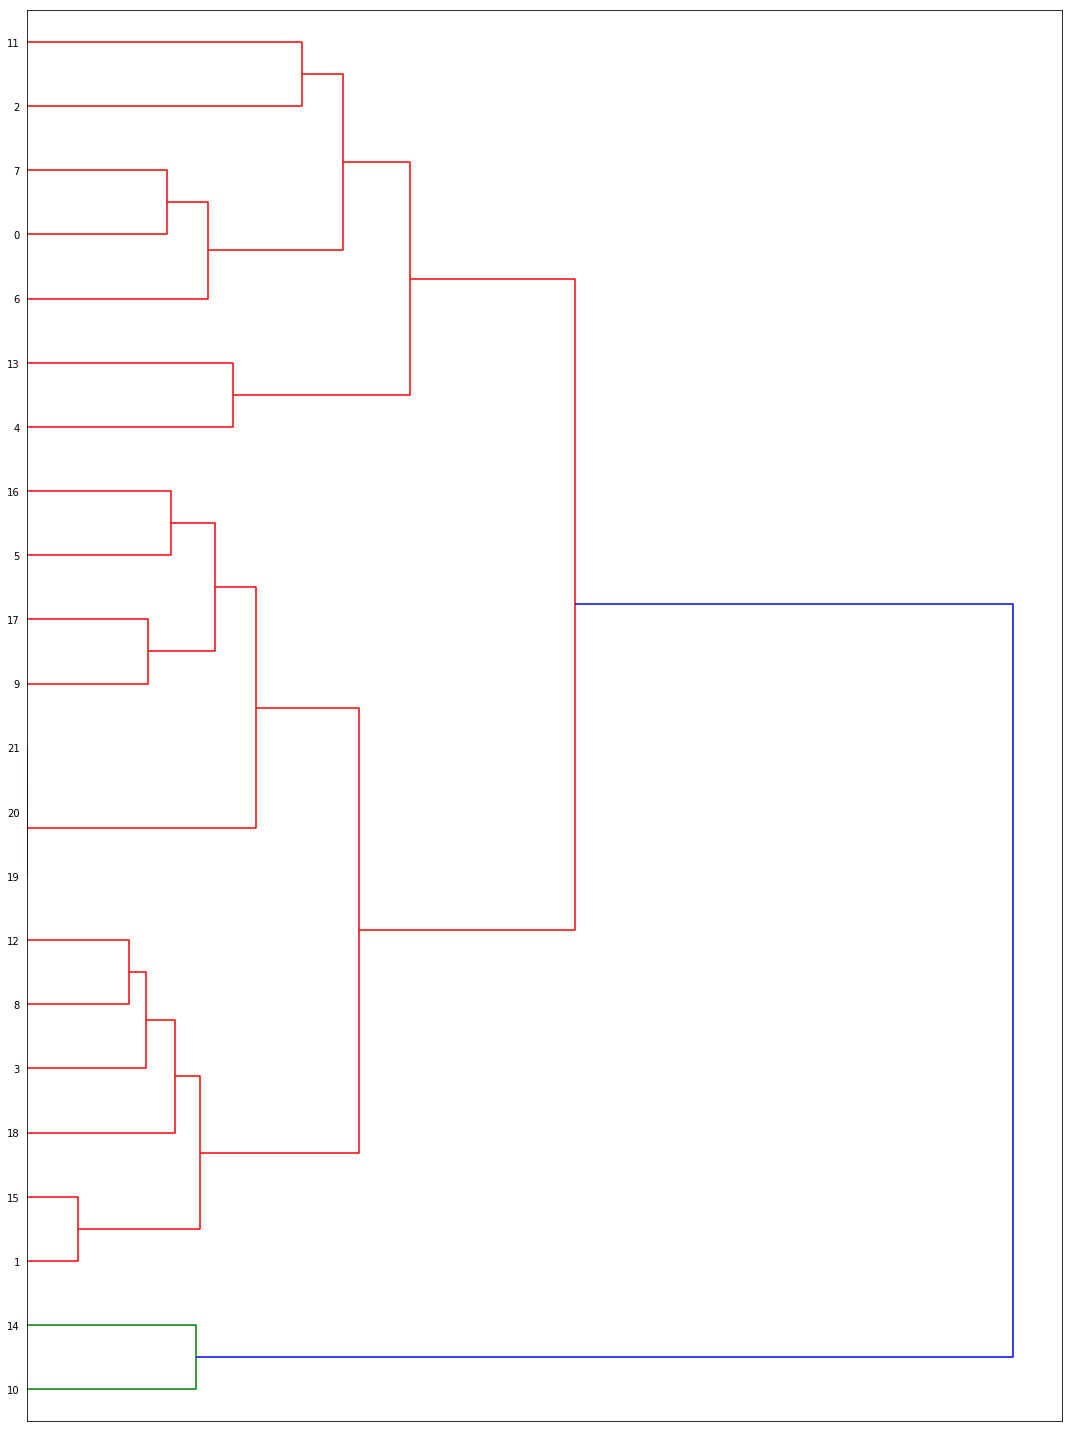

In [32]:
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(X)
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=np.arange(X.shape[0]));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [33]:
np.array(documents)[[17,9]]

array(['@Telekom_hilft Habt ihr aktuell Störungen beim WLAN ?',
       'Wird es neben dem neuen kostenfreien WLAN im ICE auch noch @Telekom_hilft Hotspots geben ?'],
      dtype='<U1638')

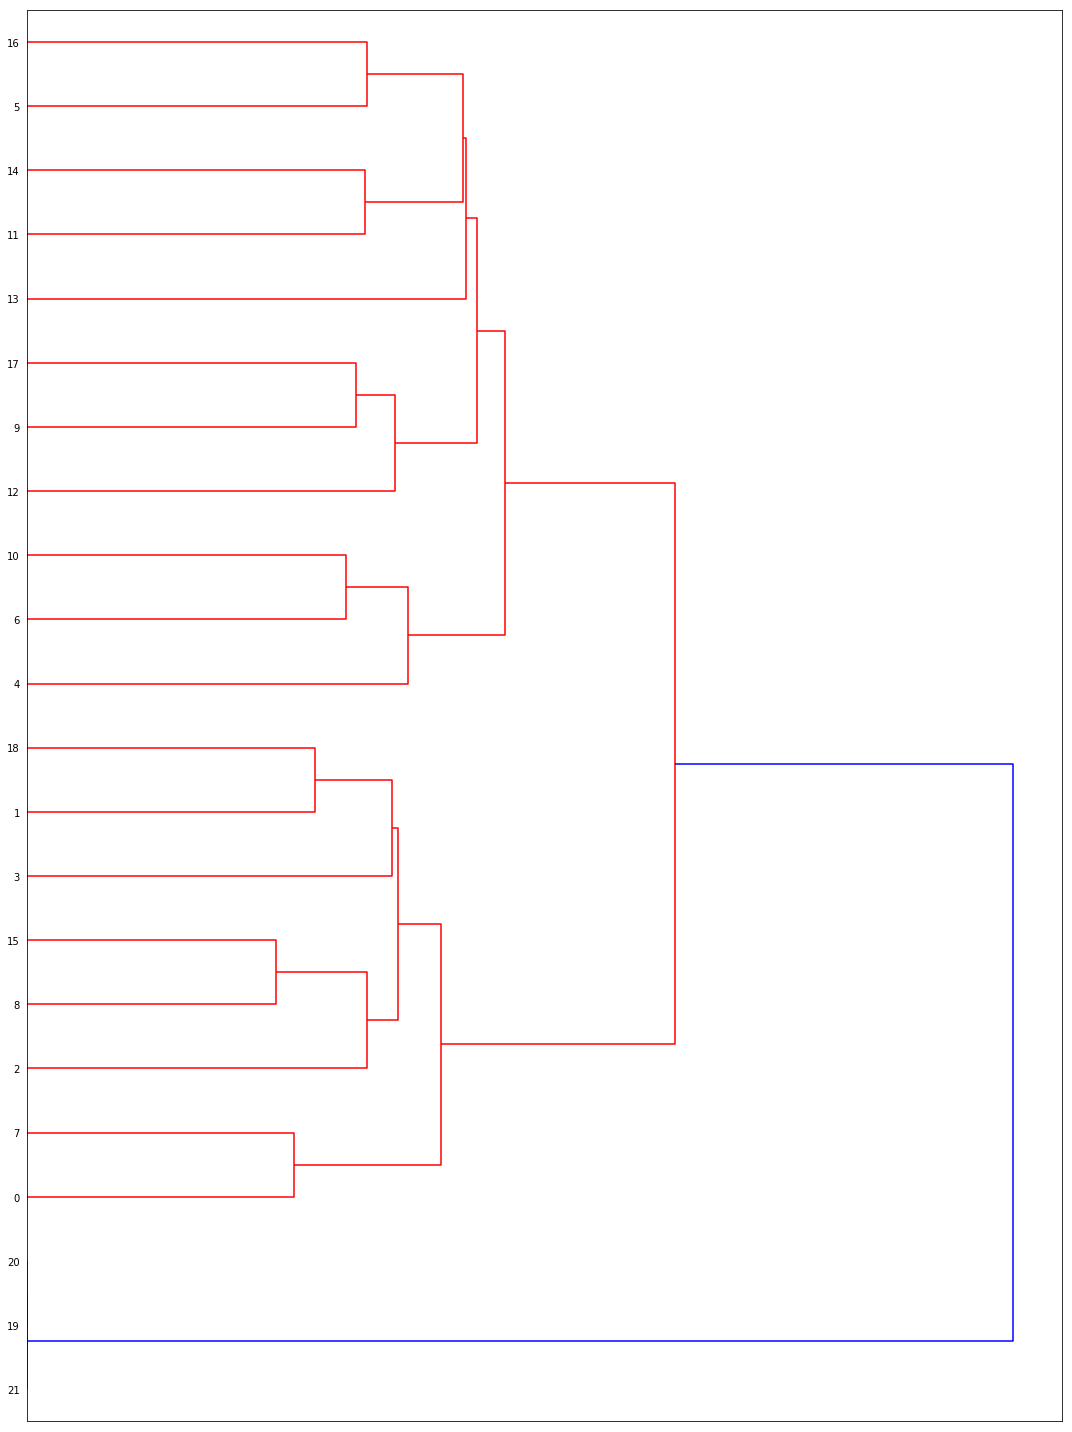

In [34]:
dist = 1 - cosine_similarity(X_bag)
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

fig, ax = plt.subplots(figsize=(15, 20)) # set size
ax = dendrogram(linkage_matrix, orientation="right", labels=np.arange(X.shape[0]));

plt.tick_params(\
    axis= 'x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off')

plt.tight_layout() #show plot with tight layout

#uncomment below to save figure
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters

In [35]:
linkage_matrix

array([[19.    , 20.    ,  0.    ,  2.    ],
       [21.    , 22.    ,  0.    ,  3.    ],
       [ 8.    , 15.    ,  0.8793,  2.    ],
       [ 0.    ,  7.    ,  0.9438,  2.    ],
       [ 1.    , 18.    ,  1.0172,  2.    ],
       [ 6.    , 10.    ,  1.1297,  2.    ],
       [ 9.    , 17.    ,  1.1639,  2.    ],
       [11.    , 14.    ,  1.1969,  2.    ],
       [ 5.    , 16.    ,  1.2019,  2.    ],
       [ 2.    , 24.    ,  1.203 ,  3.    ],
       [ 3.    , 26.    ,  1.2898,  3.    ],
       [12.    , 28.    ,  1.3011,  3.    ],
       [31.    , 32.    ,  1.3115,  6.    ],
       [ 4.    , 27.    ,  1.3482,  3.    ],
       [25.    , 34.    ,  1.4638,  8.    ],
       [29.    , 30.    ,  1.5408,  4.    ],
       [13.    , 37.    ,  1.5511,  5.    ],
       [33.    , 38.    ,  1.5925,  8.    ],
       [35.    , 39.    ,  1.6898, 11.    ],
       [36.    , 40.    ,  2.2912, 19.    ],
       [23.    , 41.    ,  3.4862, 22.    ]])

In [36]:
ward(dist)

array([[19.    , 20.    ,  0.    ,  2.    ],
       [21.    , 22.    ,  0.    ,  3.    ],
       [ 8.    , 15.    ,  0.8793,  2.    ],
       [ 0.    ,  7.    ,  0.9438,  2.    ],
       [ 1.    , 18.    ,  1.0172,  2.    ],
       [ 6.    , 10.    ,  1.1297,  2.    ],
       [ 9.    , 17.    ,  1.1639,  2.    ],
       [11.    , 14.    ,  1.1969,  2.    ],
       [ 5.    , 16.    ,  1.2019,  2.    ],
       [ 2.    , 24.    ,  1.203 ,  3.    ],
       [ 3.    , 26.    ,  1.2898,  3.    ],
       [12.    , 28.    ,  1.3011,  3.    ],
       [31.    , 32.    ,  1.3115,  6.    ],
       [ 4.    , 27.    ,  1.3482,  3.    ],
       [25.    , 34.    ,  1.4638,  8.    ],
       [29.    , 30.    ,  1.5408,  4.    ],
       [13.    , 37.    ,  1.5511,  5.    ],
       [33.    , 38.    ,  1.5925,  8.    ],
       [35.    , 39.    ,  1.6898, 11.    ],
       [36.    , 40.    ,  2.2912, 19.    ],
       [23.    , 41.    ,  3.4862, 22.    ]])